In [61]:
# Jennefer Maldonado
# AMS 528 Homework #5

import numpy as np
import matplotlib.pyplot as plt

# initial conditions
def initial(grid, xmax, xmin):
    x = np.linspace(xmin, xmax, grid)
    IC = []
    for xi in x:
        if xi < -1:
            IC.append(0)
        elif xi >= -1 and xi < 0:
            IC.append(1)
        elif xi >= 0 and xi <1:
            IC.append(-1)
        else:
            IC.append(0)
    return IC

# Limiter functions
def minmod(theta):
    return max(0, min(1,theta))

def vanLeer(theta):
    VL = (abs(theta) + theta)/(abs(theta) + 1)
    return VL

def roe(theta):
    ROE = max(0, min(1,2*theta), min(theta,2))
    return ROE

# Flux-Limiter Method for advection equation
def flux(U_t, R, phi):
    fluxes = []
    for j in range(1, len(U_t)-2):
        if (U_t[j]-U_t[j-1]) == 0 or (U_t[j+1]-U_t[j]) == 0:
            T = 0
        else:
            T = (U_t[j]-U_t[j-1])/(U_t[j+1]-U_t[j])
        fluxes.append(U_t[j]+0.5*(1-R)*(U_t[j+1]-U_t[j])*phi(T))
    return fluxes

def method(n, xmax, xmin, tmax):
    R = 0.75
    U = initial(n, xmax, xmin)
    F_mm = flux(U, R, minmod)
    F_vl = flux(U, R, vanLeer)
    F_r = flux(U, R, roe)
    t = 0 
    while t < tmax:
        U_new = []
        for j in range(1, n-2):
            U_new.append(U[j] - R*(U[j]-U[j-1])-0.5*R*(1-R)*(U[j+1]-U[j]+U[j-1]))
        U_new.insert(0,0)
        U_new.append(0)
        F_mm_new = flux(U_new, R, minmod)
        F_vl_new = flux(U_new, R, vanLeer)
        F_r_new = flux(U_new, R, roe)
        U = U_new
        t+=1
    return U, F_mm_new, F_vl_new, F_r_new


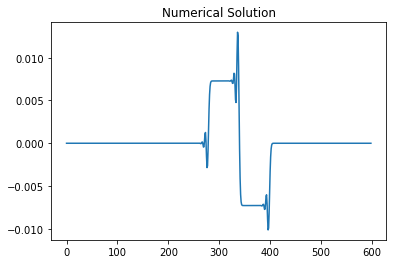

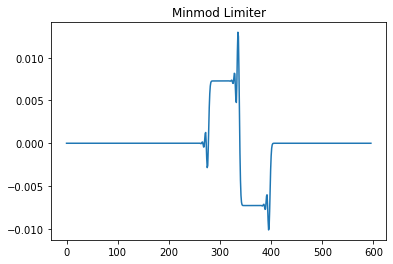

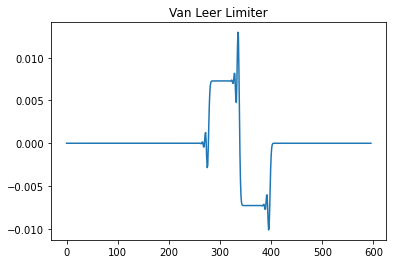

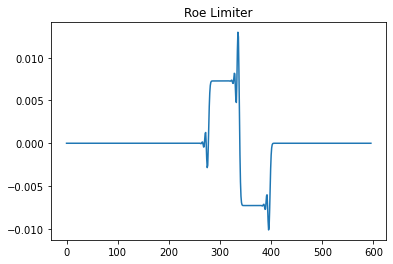

In [62]:
U_n, flux_mm, flux_vl, flux_r = method(600, 5, -5, 50)

plt.plot(U_n)
plt.title('Numerical Solution')
plt.show()
plt.plot(flux_mm)
plt.title('Minmod Limiter')
plt.show()
plt.plot(flux_vl)
plt.title('Van Leer Limiter')
plt.show()
plt.plot(flux_r)
plt.title('Roe Limiter')
plt.show()